# Explore here

Imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import json
import plotly.express as px



Import Dataset

In [5]:
url_movies= "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv"

url_credits = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv"

df_movies = pd.read_csv(url_movies)
df_credits = pd.read_csv(url_credits)

EDA

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


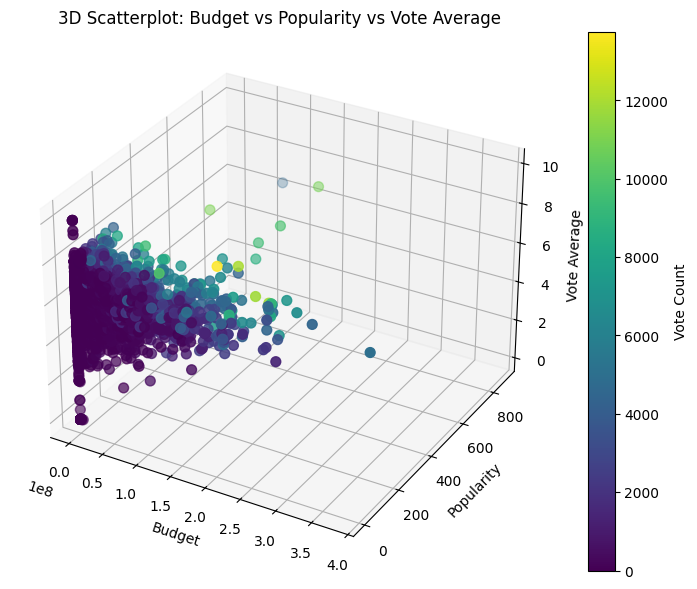

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the variables for the axes
x = df_movies['budget']
y = df_movies['popularity']
z = df_movies['vote_average']

# Plot the 3D scatter
scatter = ax.scatter(x, y, z, c=df_movies['vote_count'], cmap='viridis', s=50)

ax.set_xlabel('Budget')
ax.set_ylabel('Popularity')
ax.set_zlabel('Vote Average')

# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Vote Count')

plt.title('3D Scatterplot: Budget vs Popularity vs Vote Average')
plt.show()

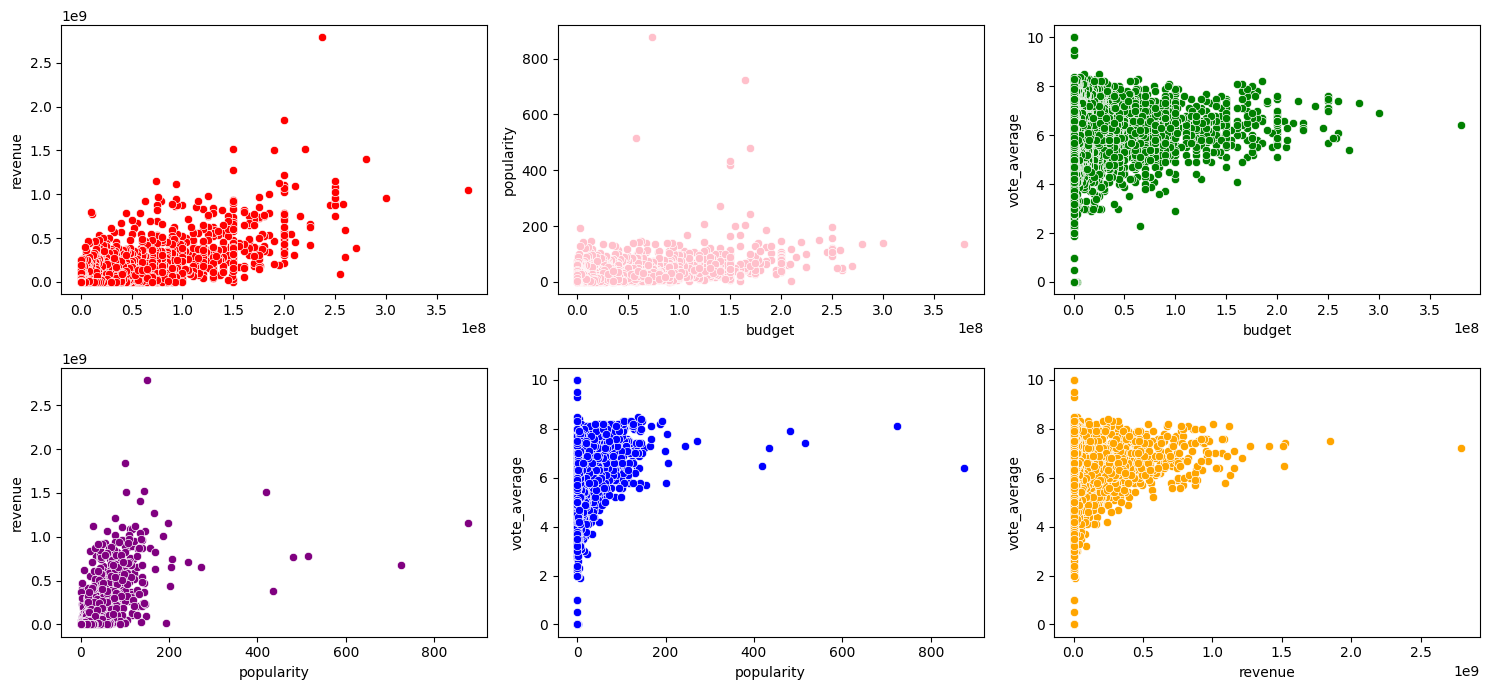

In [29]:
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Manually assign colors for each plot
colors = ['red', 'pink', 'green', 'purple', 'blue', 'orange']

# Create scatterplots for different numerical columns in the dataset
sns.scatterplot(ax=axis[0, 0], data=df_movies, x="budget", y="revenue", color=colors[0])
sns.scatterplot(ax=axis[0, 1], data=df_movies, x="budget", y="popularity", color=colors[1])
sns.scatterplot(ax=axis[0, 2], data=df_movies, x="budget", y="vote_average", color=colors[2])
sns.scatterplot(ax=axis[1, 0], data=df_movies, x="popularity", y="revenue", color=colors[3])
sns.scatterplot(ax=axis[1, 1], data=df_movies, x="popularity", y="vote_average", color=colors[4])
sns.scatterplot(ax=axis[1, 2], data=df_movies, x="revenue", y="vote_average", color=colors[5])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


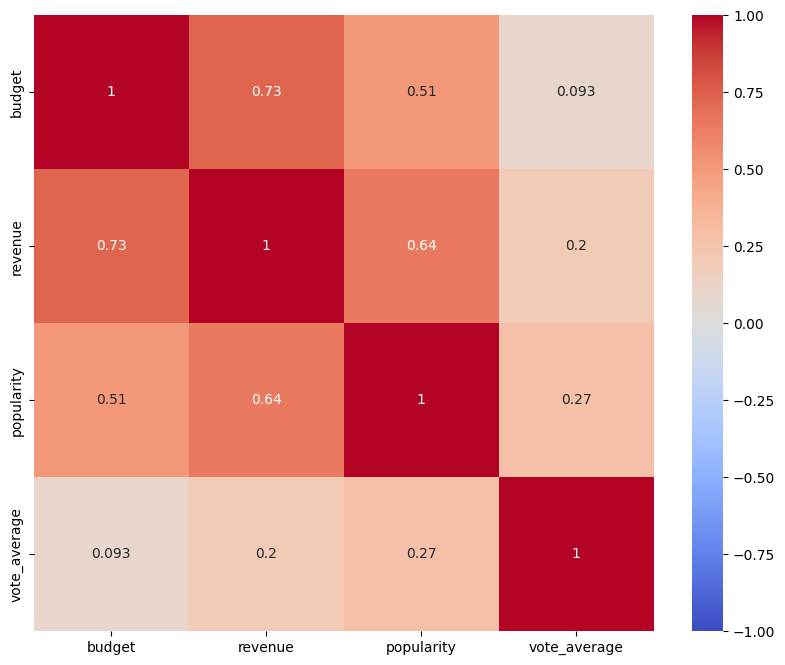

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_movies[['budget', 'revenue', 'popularity', 'vote_average']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Creation of Database

In [10]:
#Creating an SQLite in-mamory database
engine = create_engine('sqlite:///:memory:')

In [11]:
df_movies.to_sql('movies', engine, index = False, if_exists = 'replace')
df_credits.to_sql('credits', engine, index = False, if_exists = 'replace')

4803

In [16]:
query = '''
SELECT
    m.id AS movie_id,
    m.title,
    m.overview,
    m.budget,
    m.genres,
    m.keywords,
    c.cast,
    c.crew
FROM
    movies m
JOIN
    credits c
ON
    m.id = c.movie_id
'''

df_movies_credits = pd.read_sql(query, engine)

df_movies_credits.head()

,movie_id,title,overview,budget,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Training of Model

In [49]:
df_movies_credits['overview'] = df_movies_credits['overview'].fillna('')
df_movies_credits['keywords'] = df_movies_credits['keywords'].fillna('')
df_movies_credits['cast'] = df_movies_credits['cast'].fillna('')
df_movies_credits['genres'] = df_movies_credits['genres'].fillna('')

# Create 'tags' column by concatenating the relevant text columns
df_movies_credits['tags'] = df_movies_credits['overview'] + ' ' + df_movies_credits['keywords'] + ' ' + df_movies_credits['cast'] + ' ' + df_movies_credits['genres']


In [50]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=2000)

X = tfidf.fit_transform(df_movies_credits['tags']).toarray()
y = df_movies_credits['genres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train the KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred = model.predict(X_test)

y_pred


array(['[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
       '[{"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
       '[{"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
       '[{"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
       '[{"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 53, "name": "Thriller"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 18, "name": "Drama"}, {"id": 36, "name": "History"}]',
      

In [66]:
accuracy_score(y_test, y_pred)

0.04994797086368366

Hyperparameter

In [67]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [68]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy:  0.05723204994797086


In [69]:
print(y_train.value_counts())
print(y_test.value_counts())

genres
[{"id": 18, "name": "Drama"}]                                                                                                                                         302
[{"id": 35, "name": "Comedy"}]                                                                                                                                        242
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                       136
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                      119
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                           108
                                                                                                                                               